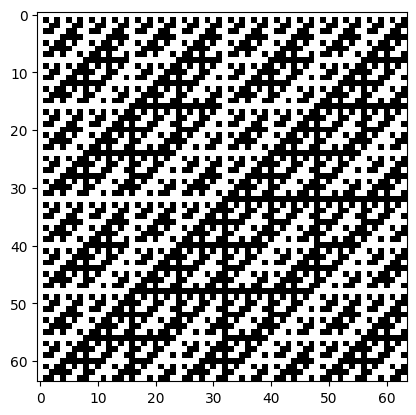

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from libs.row_wise import hadamard_row

n = 6

H = []

for i in range(2**n):
    H.append(hadamard_row(i, n))


H = np.array(H).squeeze()

plt.imshow(H, cmap='gray')
plt.show()

In [9]:
H.shape

(64, 64)